In [1]:
import h5py
import numpy as np

/mnt/bwpy/single/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load data
file = h5py.File('100_halos.hdf5', 'r')
fields = ["density", "temperature", "H_p1_fraction"]
keys = list(file.keys())
data = [[file[k][f].value for f in fields] for k in keys]
mass = [file[k]["mass"].value for k in keys]

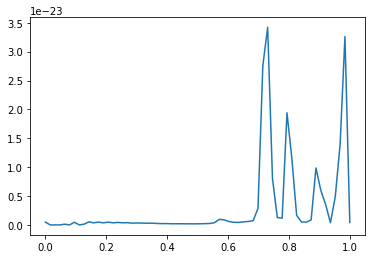

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

radius = np.linspace(0, 1, 64)
plt.plot(radius, data[0][0])

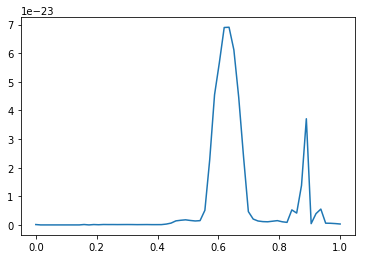

In [12]:
plt.plot(radius, data[1][0])

In [5]:
%%capture
%run frechet_distance.ipynb

In [6]:
P = [(data[0][0][i], radius[i]) for i in range(len(radius))]
Q = [(data[1][0][i], radius[i]) for i in range(len(radius))]
frechetDist(P, Q)

6.865818172783477e-23

In [7]:
def feature_similarity(haloA, haloB, feature):
    # 0 = density; 1 = temperature; 2 = ionization fraction
    P = [(data[haloA][feature][i], radius[i]) for i in range(len(radius))]
    Q = [(data[haloB][feature][i], radius[i]) for i in range(len(radius))]
    result = frechetDist(P, Q)
    return result

In [10]:
for i in range(100):
    D = feature_similarity(0, i, 0)
    T = feature_similarity(0, i, 1)
    I = feature_similarity(0, i, 2)
    if D<1 and T<1 and I<1:
        print(i)

0
